In [1]:
import util

In [2]:
num_nodes = 6
edge_probability = 0.5
G = util.generate_random_graph(num_nodes, edge_probability)

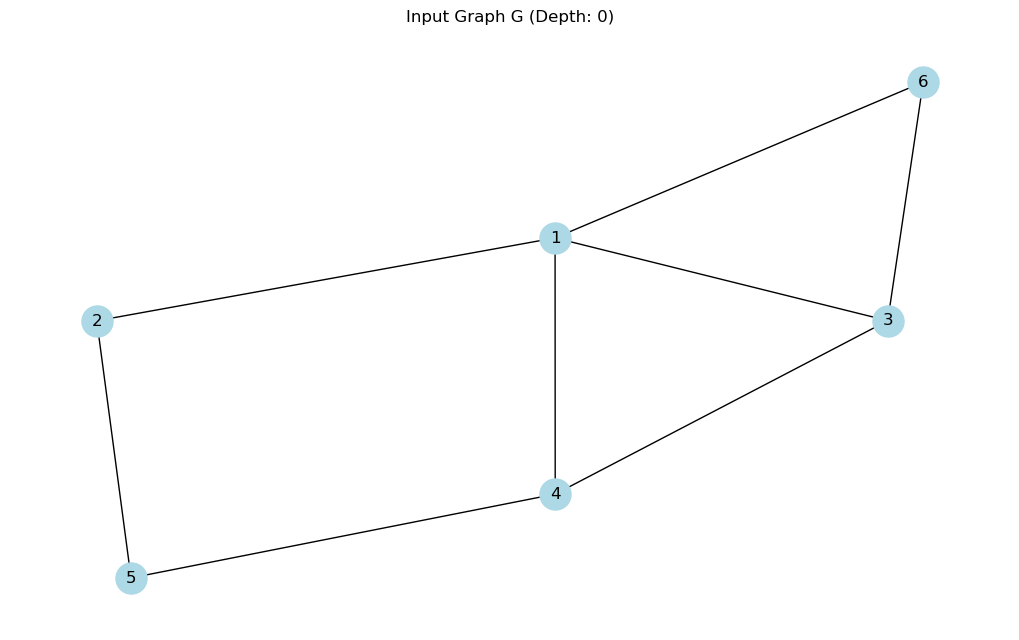

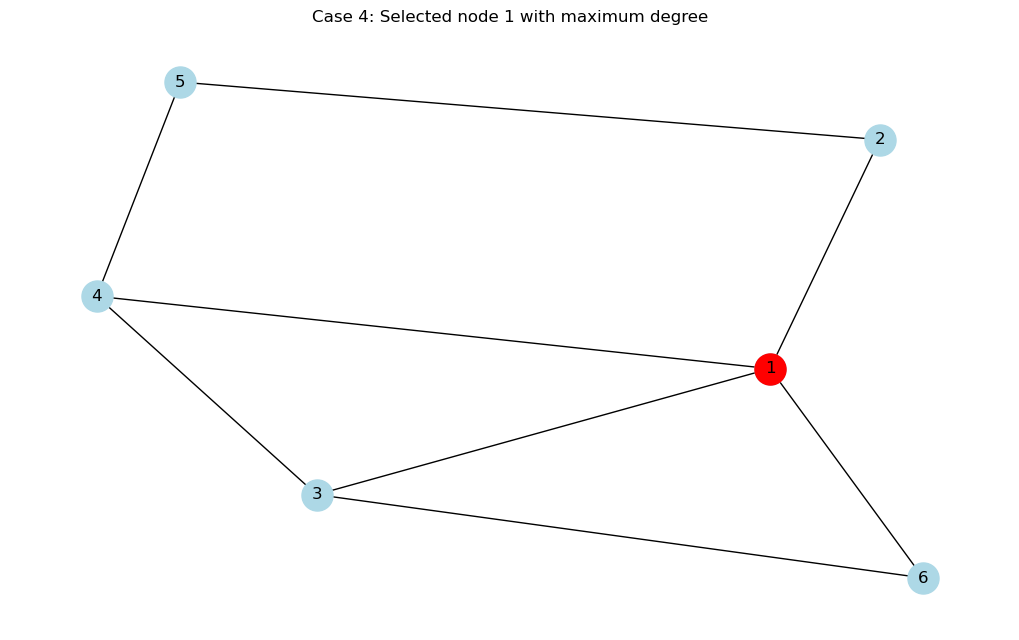

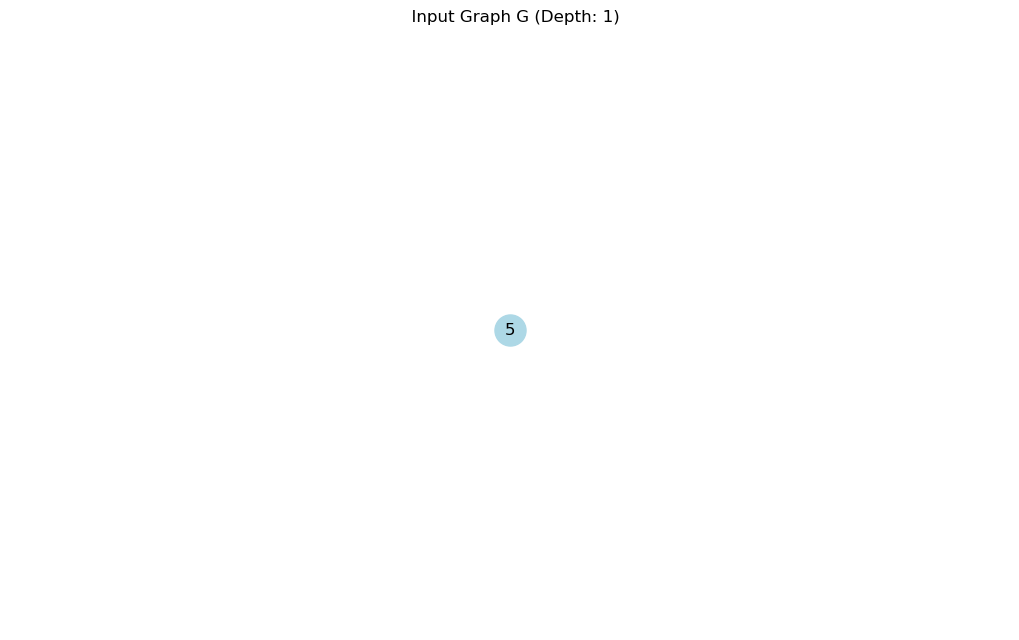

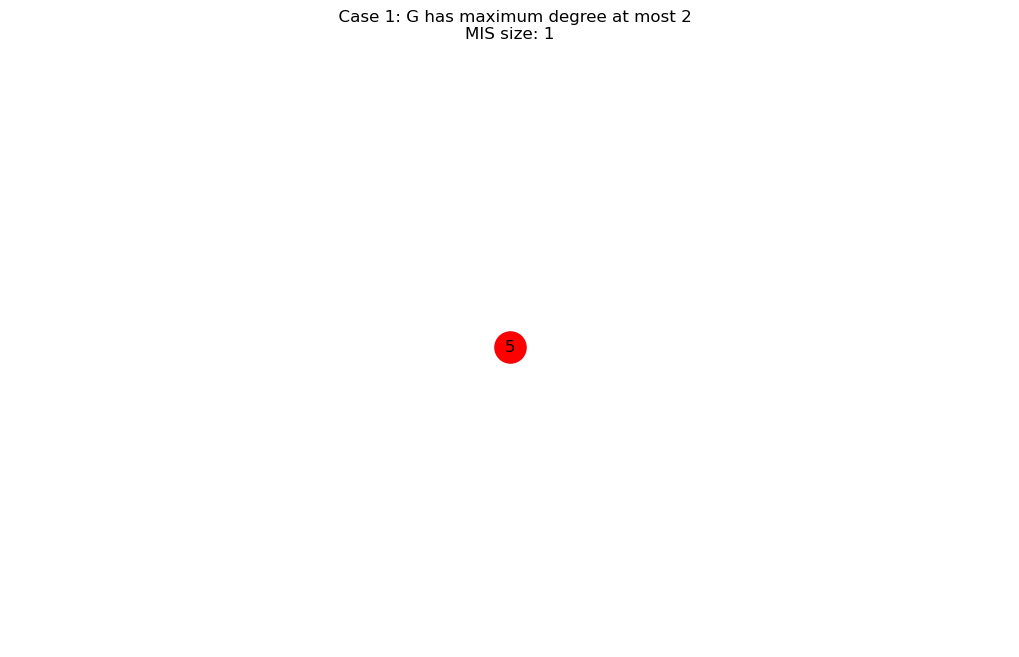

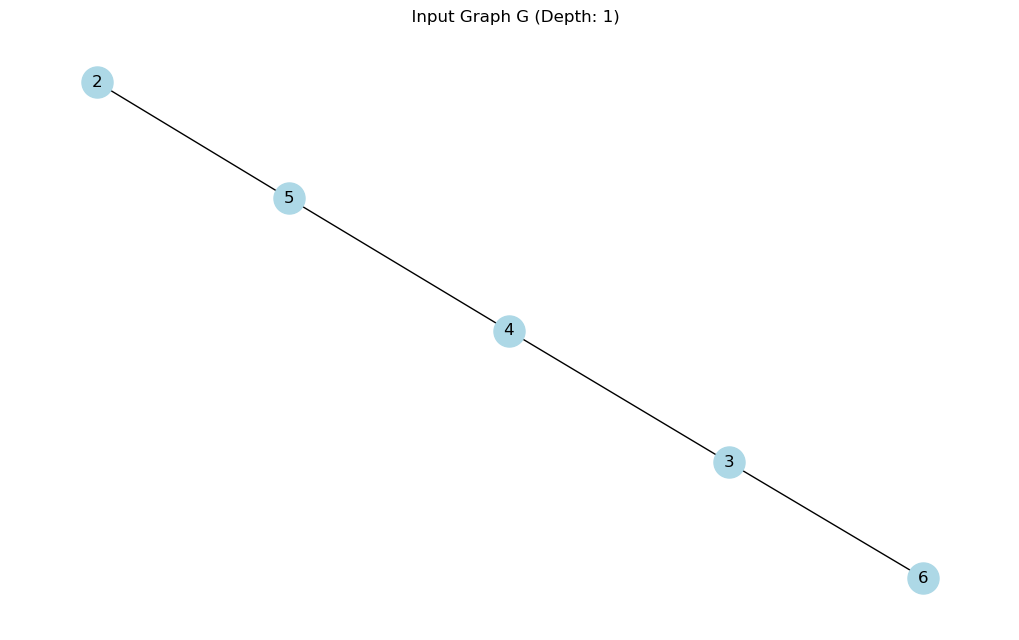

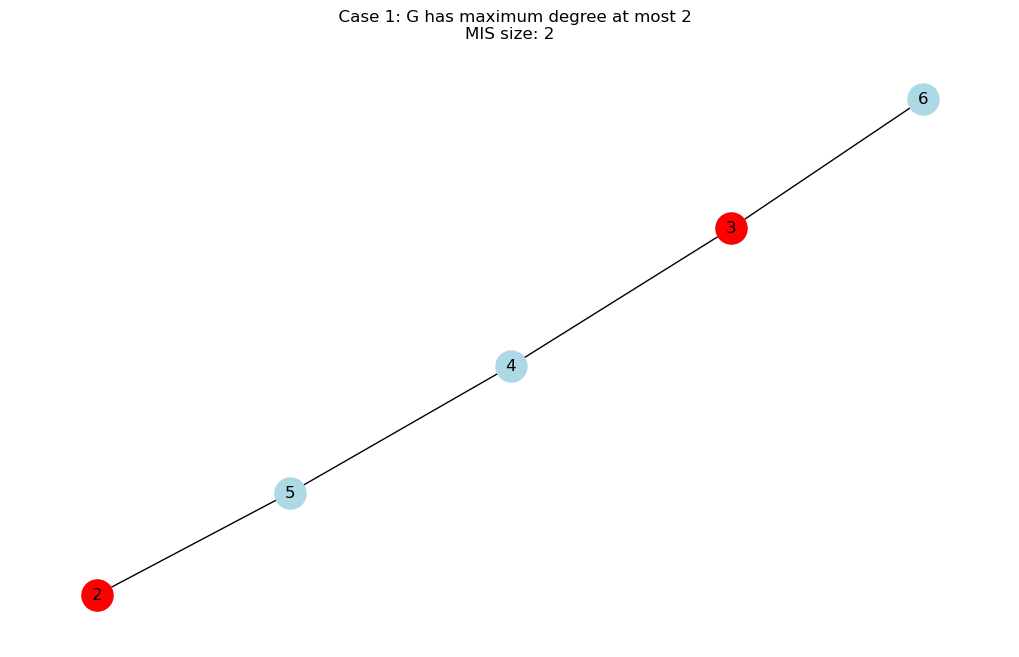

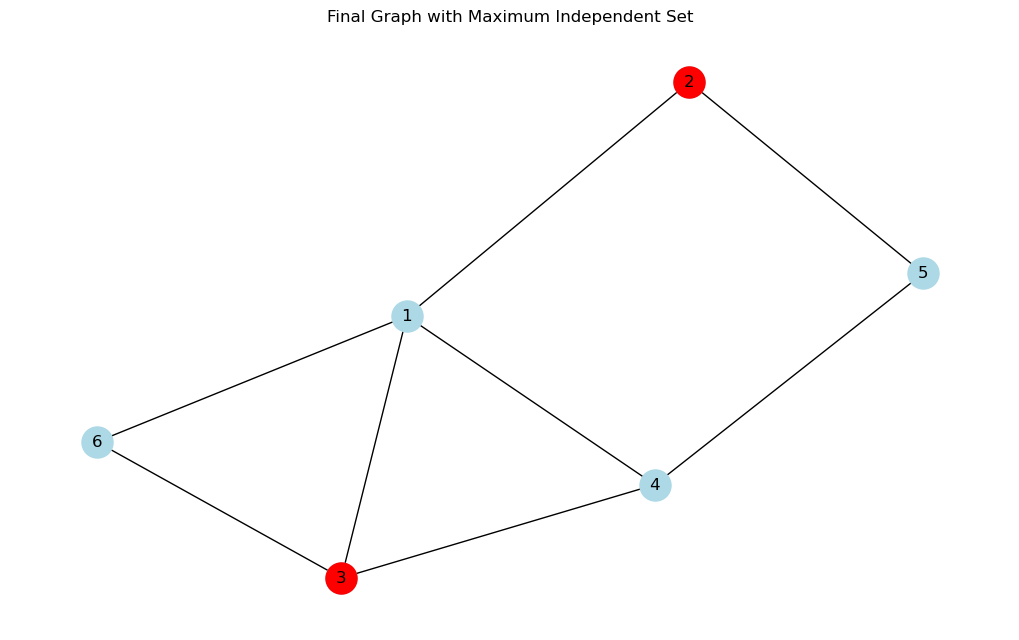

Maximum Independent Set: {2, 3}


In [3]:
independent_set = util.mis(G, visualize=True)
print("Maximum Independent Set:", independent_set)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/an/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/p2/tltdzcl142g2b8gt5mll07w00000gn/T/3b1c20c8c8e84f018fb8467a65ea686d-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/p2/tltdzcl142g2b8gt5mll07w00000gn/T/3b1c20c8c8e84f018fb8467a65ea686d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 48 RHS
At line 57 BOUNDS
At line 64 ENDATA
Problem MODEL has 8 rows, 6 columns and 16 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0004I processed model has 5 rows, 6 colum

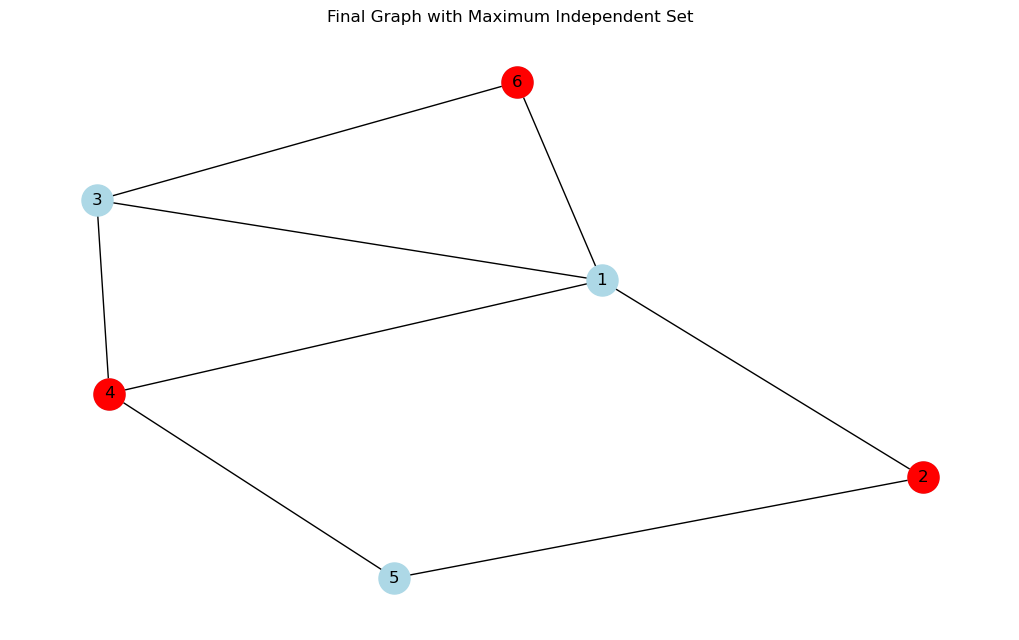

Global Maximum Independent Set: [2, 4, 6]


In [4]:
independent_set_global = util.global_maximum_independent_set(G, visualize=True)
print("Global Maximum Independent Set:", independent_set_global)
